In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("loan.csv")

In [2]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


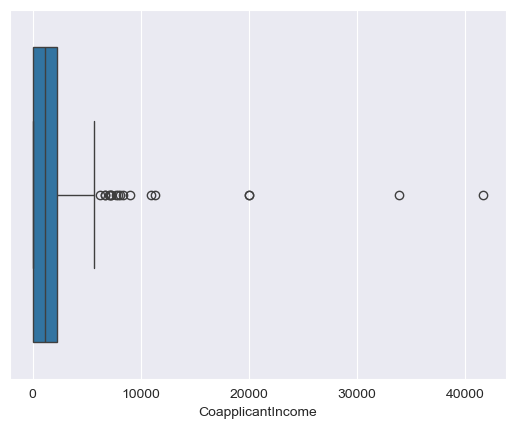

In [5]:
sns.boxplot(x = "CoapplicantIncome", data = df)
plt.show()

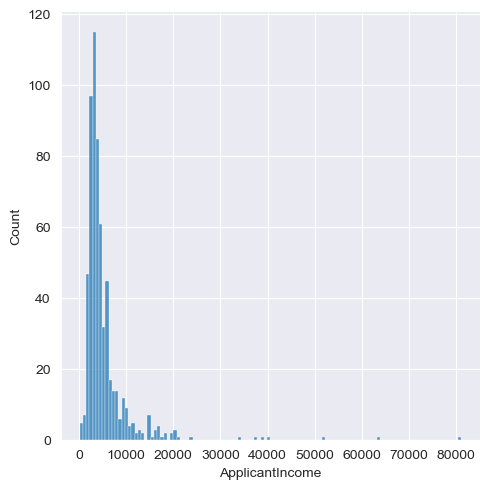

In [6]:
sns.displot(df["ApplicantIncome"])
plt.show()
# Boxplot is the best way to detect outliers


#### Two techniques to remove outliers 
#### one is IQR , the other is Z-Score

In [7]:
# IQR = Q3 - Q1
# min  = Q1-(1.5 * IQR)
# max =  Q3+(1.5 * IQR)

q1 = df["CoapplicantIncome"].quantile(0.25)
q1


0.0

In [8]:
q3  = df["CoapplicantIncome"].quantile(0.75)
q3 
# We can also check q1, q3 from df.describe()

2297.25

In [9]:
IQR = q3-q1

In [11]:
min_range = q1- (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

In [12]:
min_range, max_range 

(-3445.875, 5743.125)

###### values above max_range are outliers , so need to remove them

In [14]:
new_df = df[df["CoapplicantIncome"]<=max_range]


In [16]:
new_df.shape # 18 rows are removed

(596, 13)

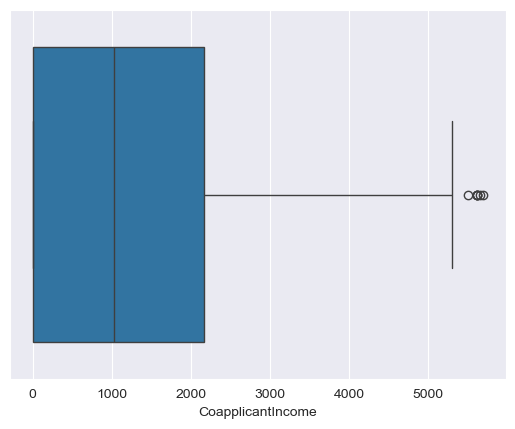

In [17]:
sns.boxplot(x = "CoapplicantIncome", data = new_df)
plt.show()

In [ ]:
# this is the minimum numbers of outliers that are allowed. if outliers removed completely this may cause damage in data
